In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import os
import matplotlib.pyplot as plt
import cv2

In [11]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


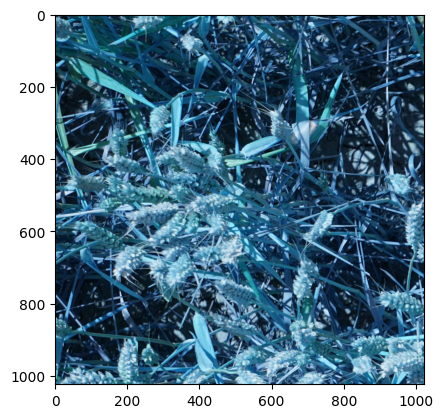

In [12]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [13]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [14]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [21]:
df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

In [ ]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

In [ ]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


Let's visualize one image with all the bboxes for that image

In [86]:
one_image_info = df[df['image_id']=='b53afdf5c']
one_image_info.head()

,image_id,width,height,bbox,source
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1


In [69]:
(one_image_info['bbox'].iloc[0][0])

'['

In [87]:
one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
one_image_info['X_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]))
one_image_info['y_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]))
one_image_info['W'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2]))
one_image_info['H'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3]))

/tmp/ipykernel_24/2839306267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
/tmp/ipykernel_24/2839306267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
/tmp/ipykernel_24/2839306267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [88]:
one_image_info

,image_id,width,height,bbox,source,X_min,y_min,X_max,y_max,W,H
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1,988.0,781.0,1024.0,877.0,36.0,96.0
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1,331.0,863.0,401.0,958.0,70.0,95.0
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1,47.0,226.0,112.0,272.0,65.0,46.0
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1,682.0,974.0,790.0,1024.0,108.0,50.0
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1,63.0,988.0,219.0,1024.0,156.0,36.0
52,b53afdf5c,1024,1024,"[824.0, 901.0, 49.0, 77.0]",usask_1,824.0,901.0,873.0,978.0,49.0,77.0
53,b53afdf5c,1024,1024,"[815.0, 413.0, 90.0, 72.0]",usask_1,815.0,413.0,905.0,485.0,90.0,72.0
54,b53afdf5c,1024,1024,"[468.0, 161.0, 172.0, 66.0]",usask_1,468.0,161.0,640.0,227.0,172.0,66.0
55,b53afdf5c,1024,1024,"[888.0, 537.0, 76.0, 74.0]",usask_1,888.0,537.0,964.0,611.0,76.0,74.0
56,b53afdf5c,1024,1024,"[3.0, 88.0, 106.0, 69.0]",usask_1,3.0,88.0,109.0,157.0,106.0,69.0


In [89]:
bboxes = one_image_info[['X_min','y_min','X_max','y_max']].values

In [90]:
for bbox in bboxes:
    # print(bbox)
    x1,y1,x2,y2 = bbox
    print(x1,y1,x2,y2)
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),2)

988.0 781.0 1024.0 877.0
331.0 863.0 401.0 958.0
47.0 226.0 112.0 272.0
682.0 974.0 790.0 1024.0
63.0 988.0 219.0 1024.0
824.0 901.0 873.0 978.0
815.0 413.0 905.0 485.0
468.0 161.0 640.0 227.0
888.0 537.0 964.0 611.0
3.0 88.0 109.0 157.0
266.0 657.0 323.0 733.0
582.0 771.0 776.0 854.0
77.0 653.0 195.0 729.0
673.0 433.0 821.0 525.0
620.0 673.0 739.0 780.0
224.0 760.0 314.0 842.0
160.0 933.0 339.0 1003.0
961.0 784.0 1014.0 945.0
392.0 497.0 570.0 564.0
0.0 536.0 116.0 611.0
838.0 761.0 926.0 871.0
542.0 222.0 693.0 297.0
157.0 2.0 238.0 56.0
206.0 0.0 418.0 72.0
91.0 114.0 141.0 188.0
0.0 234.0 79.0 312.0
128.0 328.0 208.0 440.0
31.0 305.0 155.0 427.0
143.0 442.0 194.0 539.0
223.0 319.0 264.0 362.0
0.0 705.0 58.0 770.0
0.0 506.0 120.0 577.0
404.0 506.0 579.0 632.0
466.0 515.0 575.0 636.0
682.0 79.0 726.0 142.0
491.0 189.0 644.0 250.0
375.0 211.0 414.0 287.0
405.0 276.0 461.0 326.0
447.0 291.0 522.0 340.0
121.0 712.0 208.0 765.0
287.0 794.0 356.0 868.0
945.0 798.0 1005.0 930.0
880.0 468.0

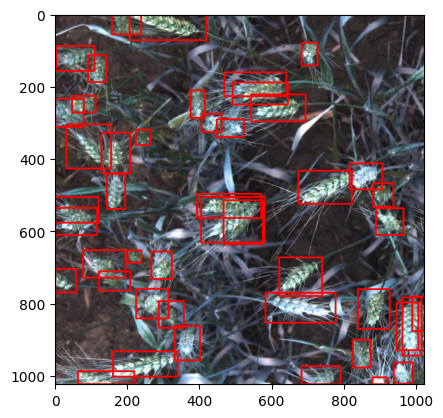

In [91]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b53afdf5c.jpg')
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    